In [ ]:
pip install tensorflow numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Add a channel dimension to the images (required for CNN)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [ ]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1512 - accuracy: 0.9525 - val_loss: 0.0457 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0330 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0257 - val_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0267 - val_accuracy: 0.9906


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0664 - accuracy: 0.9792
Test accuracy: 0.979200005531311


In [ ]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 11ms/step


In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 964    0    0    0    1    0    8    1    4    2]
 [   0 1121    2    1    0    0    2    0    9    0]
 [   1    3 1019    2    0    0    0    3    4    0]
 [   1    0    5  982    0   10    0    1    7    4]
 [   1    0    2    0  964    0    4    0    1   10]
 [   1    0    0    7    0  874    7    1    1    1]
 [   2    2    0    0    2    3  948    0    0    1]
 [   1    5   11    3    1    0    0  987    4   16]
 [   6    0    2    3    1    1    3    1  955    2]
 [   2    3    2    7   10    3    0    2    2  978]]


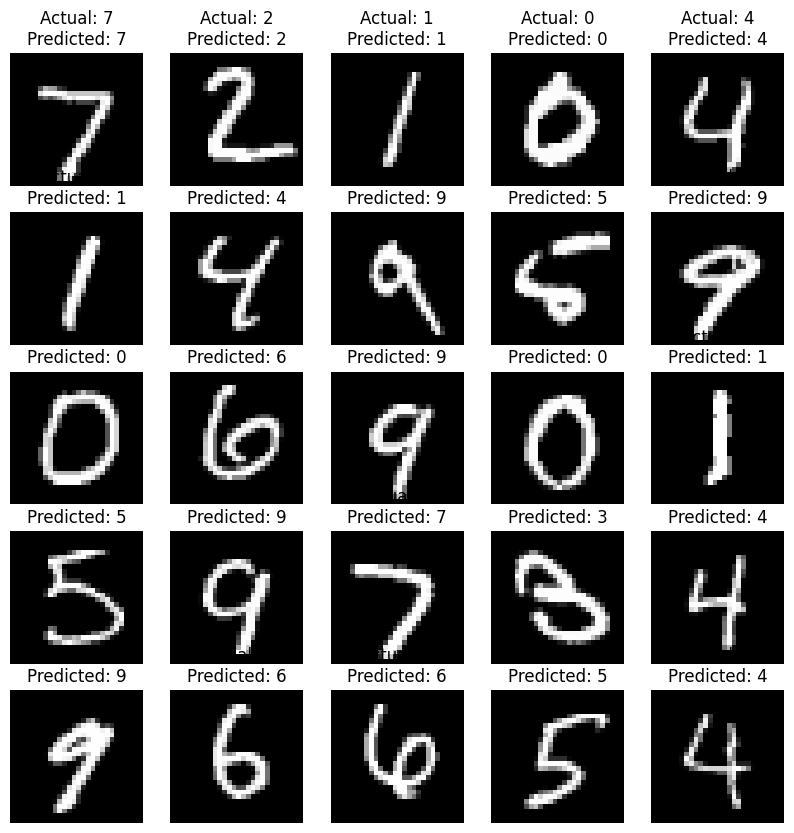

In [ ]:
# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title(f'Actual: {test_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()